

# Project:Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the TMDb movie dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Based on this dataset various questions will be answered. For example, Which genres are most popular from year to year?Which Movie Has The Highest Or Lowest Profit? Which year has the highest release of movies? Which year has the highest profit rate? And average Runtime Of Movies From Year To Year? and the likes, so Lets start exploring the dataset.

In [6]:
# packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [7]:
# Loading my data and printing out a few lines. Perform operations to inspect data

data = pd.read_csv('tmdb-movies.csv')

# printing data shapes

print(data.shape)

(10866, 21)



### Data Cleaning

In [8]:
# printing data colums 

print(list(data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [9]:
# inspecting the first 10 rows

data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [10]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
# duplicate values

sum(data.duplicated())

1

In [13]:
# delete duplicates

data[data.duplicated()]
data.drop_duplicates(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [15]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
# dropping column that are not relevant

columns = ['homepage', 'tagline', 'overview']
data.drop(labels = columns, axis = 1, inplace = True)

In [18]:
# cheecking for changes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   director              10821 non-null  object 
 8   keywords              9372 non-null   object 
 9   runtime               10865 non-null  int64  
 10  genres                10842 non-null  object 
 11  production_companies  9835 non-null   object 
 12  release_date          10865 non-null  object 
 13  vote_count            10865 non-null  int64  
 14  vote_average          10865 non-null  float64
 15  release_year       

In [20]:
# converting release_date in datetime object

data['release_date'] = pd.to_datetime(data['release_date'], format = '%m/%d/%y')

In [21]:
# checking for date format

data['release_date'].dtype

dtype('<M8[ns]')

In [25]:
# columns datatypes

data.shape

(10865, 18)

In [27]:
# inpecting rows with missing values 

data[data.isnull().any(axis = 'columns')].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
130,245706,tt2273657,1.284541,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,Rupert Goold,NaN,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,2015-04-17,354,6.0,2015,0.000000e+00,4.342117e+06
149,346808,tt3181776,1.041922,20000000,0,Momentum,Olga Kurylenko|Morgan Freeman|James Purefoy|Je...,Stephen S. Campanelli,NaN,96,Thriller|Action,Thaba Media|Azari Media,2015-08-01,100,5.8,2015,1.839999e+07,0.000000e+00
154,314405,tt3278330,1.008474,12000000,0,Il racconto dei racconti,Salma Hayek|Vincent Cassel|John C. Reilly|Toby...,Matteo Garrone,NaN,125,Romance|Fantasy|Horror,HanWay Films|Rai Cinema|Le Pacte|Fonds Eurimag...,2015-05-14,211,5.7,2015,1.104000e+07,0.000000e+00
155,282984,tt3715320,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,2015,1.012000e+07,2.519979e+07
160,304372,tt3862750,0.950793,12000000,60273173,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,NaN,100,Drama|Thriller,Screen Gems,2015-09-11,122,5.6,2015,1.104000e+07,5.545129e+07


In [29]:
new_data = data.dropna(axis = 0, how = 'any')
new_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
# Checking for an zero values in the budget and revenue columns

print("Rows With Zero Values In The Budget Column:",new_data[(new_data['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",new_data[(new_data['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 3938
Rows With Zero Values In The Revenue Column: 4128


<a id='eda'></a>
## Exploratory Data Analysis



###  Question 1: What genres is most popular from year to year ?

In [42]:
#maping all the rows of genres in a list

genre_details = list(map(str,(new_data['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#making the numpy array of year and popularity

year = np.array(new_data['release_year'])
popularity = np.array(new_data['popularity'])

#making a null dataframe which indexs are genres and columns are years

popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

#changing all the values of the dataframe from NAN to zero

popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [43]:
#calculating the standard deviation for the accurate results
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.787406,1.412525,2.141955,1.401893,0.551670,1.165511,1.010683,1.910834,1.542191,1.185769,...,0.630692,0.531893,0.715091,1.075846,1.181868,0.715645,0.846853,0.861791,1.276039,1.703254
Science Fiction,-0.447325,-0.556638,-0.636604,-0.644910,-0.666672,-0.876989,0.131481,-0.662380,1.459949,-0.681990,...,-0.284121,-0.377038,0.115034,0.753808,-0.082211,0.331251,0.226036,0.692389,0.953083,1.289502
Fantasy,-0.509629,-0.820387,-0.691328,-0.894400,-0.036621,-1.000553,-0.571201,-0.675757,-0.051966,-0.745323,...,0.075525,0.383375,-0.050630,0.158581,0.148692,0.040909,0.137821,-0.122478,-0.073655,-0.301214
Crime,-0.589720,-0.074778,-0.164532,-0.018738,0.084081,-0.519955,-0.003601,0.412203,0.213106,0.664515,...,0.127402,0.311832,0.271374,-0.380052,-0.163605,0.008252,0.123296,0.334549,-0.247828,0.034366
Western,0.739240,-0.563588,-0.242870,-0.862068,-1.008551,-0.524436,0.002440,-0.747084,-0.823969,1.081536,...,-1.027261,-1.004640,-1.072942,-1.097710,-0.941809,-0.942769,-0.847386,-0.965210,-0.928602,-0.742206


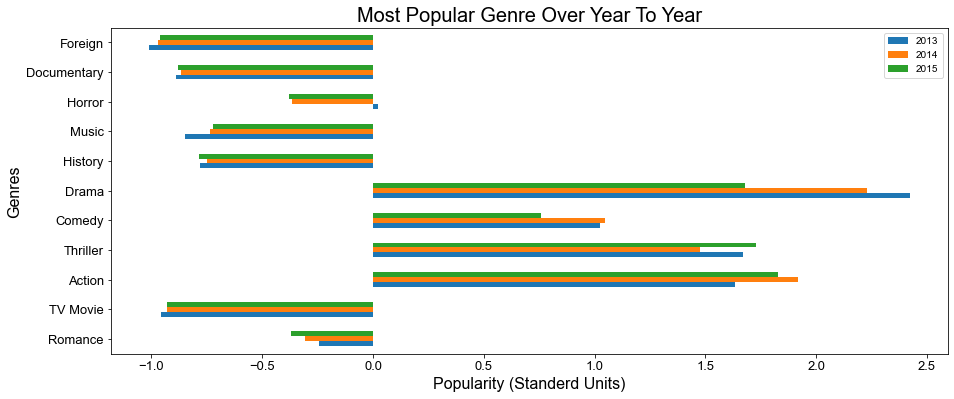

In [46]:
#plot the bar plot 
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=20)
plt.xlabel("Popularity (Standerd Units)",fontsize=16)
plt.ylabel("Genres",fontsize = 16)
sns.set_style("darkgrid")

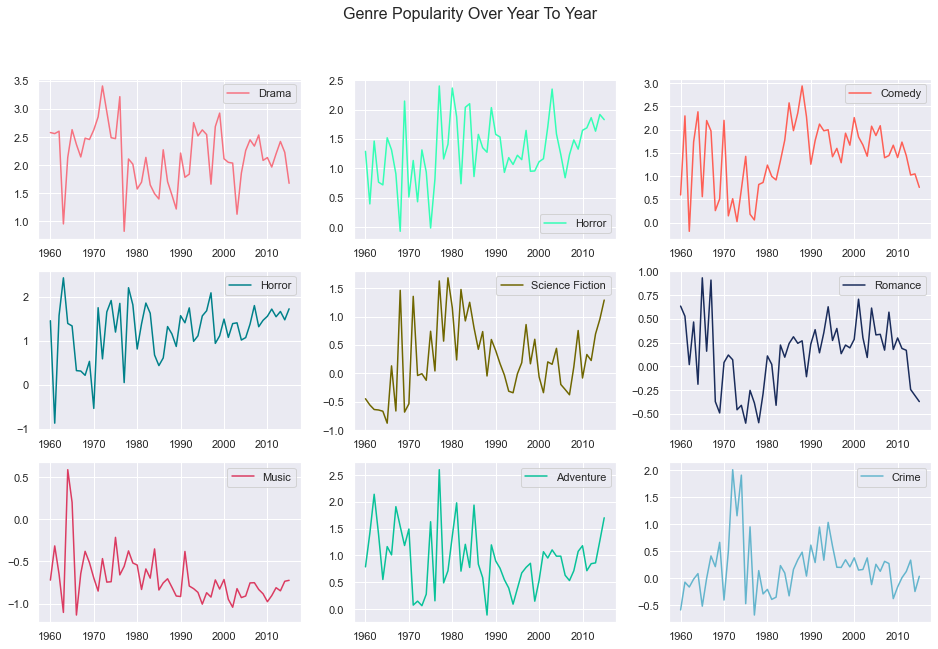

In [56]:
#How the popularity of the genre differ year by year

sns.set_style("darkgrid")

#making a subplot of size 3,3

fig, ax = plt.subplots(3,3,figsize = (16,10))

#setting the title of the subplot

fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plotting the 'Drama' genre plot see the popularity difference over year to year

popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)

#plotting the 'Action' genre plot see the popularity difference over year to year

popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)

#plotting the 'Comedy' genre plot see the popularity difference over year to year

popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'

popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

### Question 2:  Which Movie Has The Highest Or Lowest Profit?

In [50]:
def find_minmax(x):
    
    #using the function 'idmin' to find the index of lowest profit movie
    
    min_index = new_data[x].idxmin()
    
    #using the function 'idmax' to find the index of Highest profit movie
    
    high_index = new_data[x].idxmax()
    high = pd.DataFrame(new_data.loc[high_index,:])
    low = pd.DataFrame(new_data.loc[min_index,:])
    
    #printing the movie with high and low profit
    
    print("Movie Which Has Highest "+ x + " : ",new_data['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",new_data['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

# find_minmax function
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


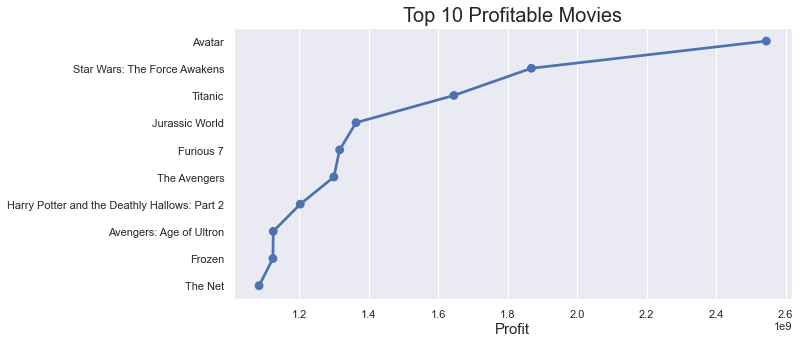

In [55]:
#sorting the 'Profit' column in decending order and store it in the new dataframe

info = pd.DataFrame(new_data['Profit'].sort_values(ascending = False))
info['original_title'] = new_data['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#making a plot using pointplot for top 10 profitable movies

ax = sns.pointplot(x=y,y=x)

#seting up the figure size

sns.set(rc={'figure.figsize':(10,5)})

#seting up the title and labels of the plot

ax.set_title("Top 10 Profitable Movies",fontsize = 20)

ax.set_xlabel("Profit",fontsize = 15)

sns.set_style("darkgrid")

###  Question 3: Which year has the highest release of movies?

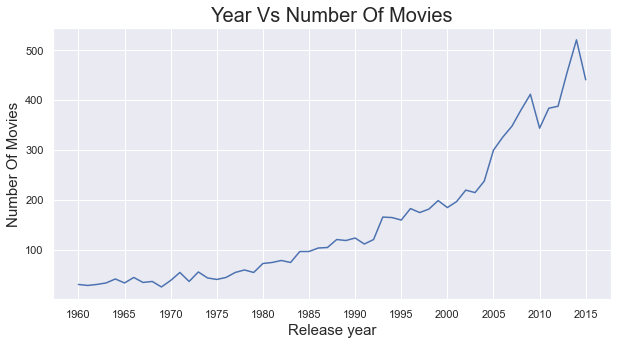

In [68]:
# making group for each year and count the number of movies in each year 

data=new_data.groupby('release_year').count()['id']


#making group of the data 

new_data.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#setting the figure size and labels

sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 20)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15)

#setting the style sheet

sns.set_style("darkgrid")

###  Question 4: Which year has the highest profit rate?

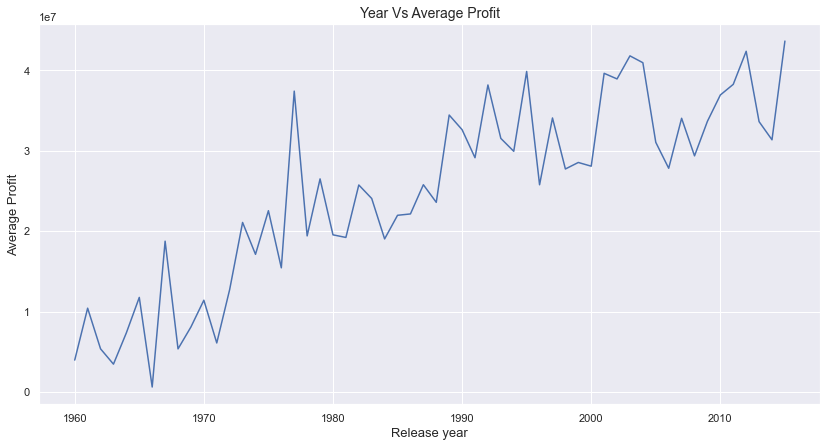

In [77]:
#making the group of the data according to their release_year and find the mean profit and plot

new_data.groupby('release_year')['Profit'].mean().plot()
print()
#setting up the title and labels of the figure

plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setting up the figure size

sns.set(rc={'figure.figsize':(14,7)})
sns.set_style("darkgrid")

### Question 5: Average Runtime Of Movies From Year To Year?

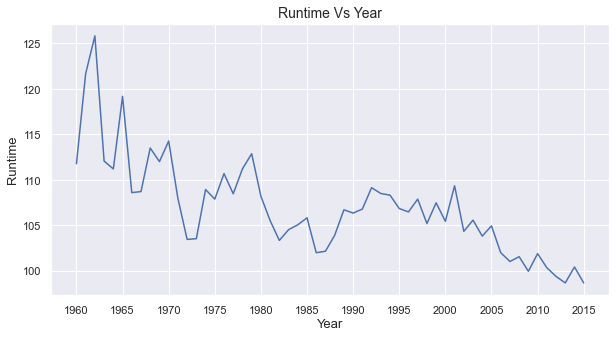

In [66]:
#making the group of the data 

new_data.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setting up the figure size

sns.set(rc={'figure.figsize':(10,5)})

#setting up the title of the figure

plt.title("Runtime Vs Year",fontsize = 14)

#setting up the x-label and y-label of the plot

plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("darkgrid")


<a id='conclusions'></a>
## Conclusions

> After exploring our dataset, I found out that:
1. The most popular genres from year to year is Drama,followed by action,thriller and comedy.
2. The movie with the highest profit is 'avatar' and the movie with the lowest profit is 'the warrior's way'.
3. The year with the highest release of movies is 2014,total is 520 release in 2014.
4. The profit with the highest profit rate is 2014.
5. And the average runtime year by year decreases.



In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0